In [ ]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path("/content/drive/My Drive/SIH Datasets/Severity_Dataset")

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    # item_tfms=[Resize(192, method='squish')],
    item_tfms=[Resize(192)]
    #,
    # batch_tfms=aug_transforms(mult=2)
).dataloaders(path)

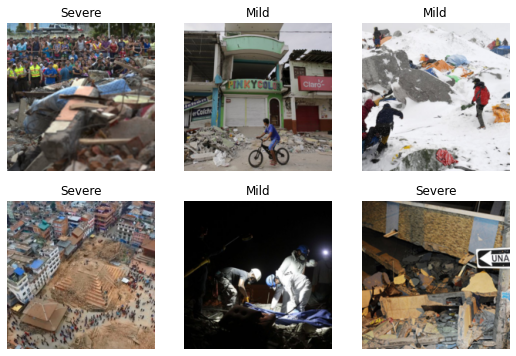

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.060473,0.832634,0.737500,10:52


epoch,train_loss,valid_loss,accuracy,time
0,0.648685,0.744367,0.795000,15:03
1,0.524320,0.736603,0.782500,14:10
2,0.412833,0.925392,0.772500,14:19
3,0.348391,0.717721,0.827500,14:23
4,0.268200,0.842027,0.805000,14:39
5,0.205937,0.727464,0.822500,14:05
6,0.164424,0.701669,0.825000,14:04
7,0.120677,0.706374,0.832500,14:01
8,0.094408,0.704965,0.832500,14:00
9,0.080303,0.700584,0.827500,14:05


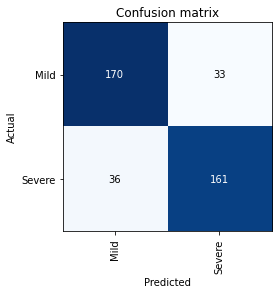

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

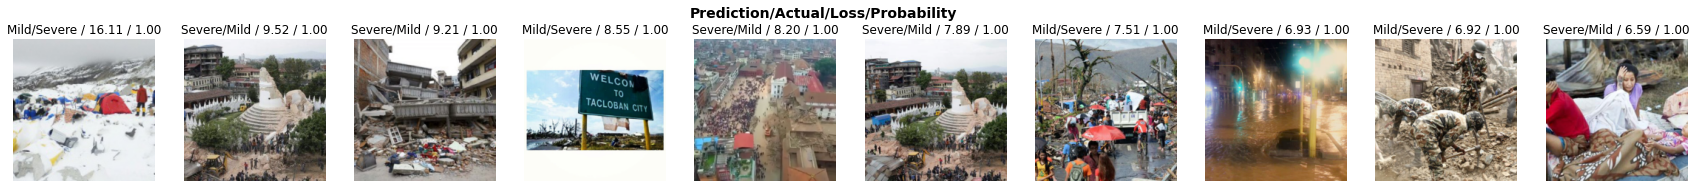

In [ ]:
interp.plot_top_losses(10, nrows=1)

In [ ]:
learn.export('sev_model.pkl')

In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)